# Advanced Contour Properties
## 區別手寫 O，X

In [1]:
import numpy as np
import imutils
import cv2

# 資料視覺化模組
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 不要顯示惱人的 warning 訊息
import warnings
warnings.filterwarnings('ignore')

# 在 Notebook 裡可即時繪圖
%matplotlib inline  

plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams.update({'font.size':13})

In [3]:
# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("../input/tictactoe.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

## solidity = contour area / convex hull area

> convex hull : 凹凸狀的物體
>
> 如何得知 solidity 0.9 , 0.5 ?  
> Ans: 只要計算出每個 contour 的 solidity 值就可以看出箇中的邏輯。

O (Contour #1) -- solidity=0.98
X (Contour #2) -- solidity=0.60
O (Contour #3) -- solidity=0.98
X (Contour #4) -- solidity=0.60
X (Contour #5) -- solidity=0.60
O (Contour #6) -- solidity=0.98
? (Contour #7) -- solidity=0.28


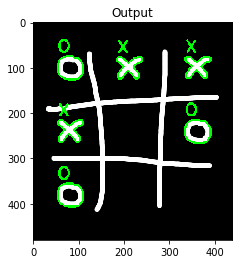

In [6]:
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # initialize the character text
    char = "?"

    # if the solidity is high, then we are examining an `O`
    if solidity > 0.9:
        char = "O"

    # otherwise, if the solidity it still reasonable high, we
    # are examining an `X`
    elif solidity > 0.5:
        char = "X"

    # if the character is not unknown, draw it
    if char != "?":
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
            (0, 255, 0), 4)

    # show the contour properties
    print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))

# show the output image
plt.title("Output")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()